We have two variables: X and Y. X is numeric or ordinal. Y is binary. (Y=0 or Y=1)

AUC(X, Y)

AUC - technically: area under the ROC curve. 

Equivalent - via probability. Let's sample one observation ($X_0$, Y), where Y=0 and one observation ($X_1$, Y) where Y=1. 

$AUC = P(X_1 > X_0) + \frac{1}{2}P(X_0 = X_1)$

When there is no association (~correlation) between X and Y, AUC = 0.5. 

Somers' D (Gini in banking) = $2 AUC - 1$

$D = P(X_1 > X_0) - P(X_1 < X_0)$

In [11]:
import numpy as np
np.random.seed(123)
n0 = 100
n1 = 100 

x0 = np.random.normal(loc=0, scale=1, size=n0)
x1 = np.random.normal(loc=1.2, scale=1, size=n1)

X = np.concatenate([x0, x1])
Y = np.concatenate([np.zeros(n0), np.ones(n1)])


Find AUC(X, Y)


In [12]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(Y, X)
print(auc)

0.7770999999999999


AUC - miara zależności między wzrostem a płcią.

https://docs.google.com/spreadsheets/d/1AdpoO4hsHwsiQCYvOiyGE2u8Zylg11o-xYuiLv7hNFA/edit?usp=sharing

In [15]:
import pandas as pd
csv_url = "https://docs.google.com/spreadsheets/d/1AdpoO4hsHwsiQCYvOiyGE2u8Zylg11o-xYuiLv7hNFA/export?format=csv"
d = pd.read_csv(csv_url)
d.head()

,height,gender
0,185.0,Male
1,173.0,Male
2,190.0,Male
3,184.0,Male
4,168.0,Female


In [16]:
roc_auc_score(d['gender'], d['height'])


0.9478808864265927

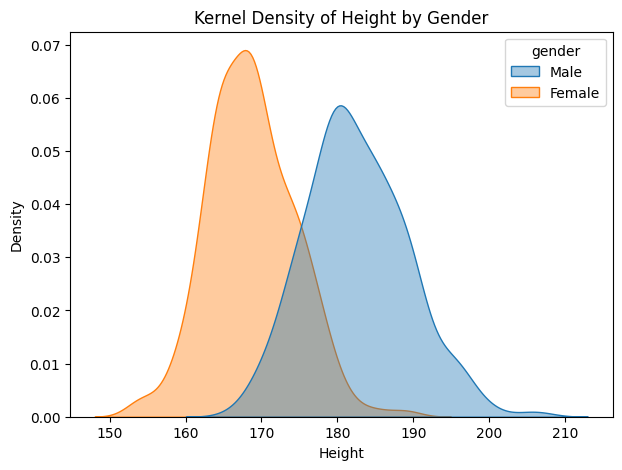

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.kdeplot(
    data=d,
    x="height",
    hue="gender",
    fill=True,
    common_norm=False,
    alpha=0.4
)

plt.xlabel("Height")
plt.ylabel("Density")
plt.title("Kernel Density of Height by Gender")
plt.show()